In [1]:
# Predict whether a person has diabetes (yes/no) based on 
# health indicators like glucose level, age, BMI, etc.
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url =  "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
x = df.drop('Outcome', axis =1)
y = df['Outcome']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.3, random_state=42)
model = LogisticRegression(max_iter =1000)
model.fit(x_train, y_train)
# logistic regression outputs probabilities and uses the sigmoid function for binary classification

LogisticRegression(max_iter=1000)

In [6]:
y_pred  = model.predict(x_test)
print("accuracy: ", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix: ", confusion_matrix(y_test, y_pred))
print("\nClassification report: ", classification_report(y_test, y_pred))

accuracy:  0.7359307359307359

Confusion Matrix:  [[120  31]
 [ 30  50]]

Classification report:                precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



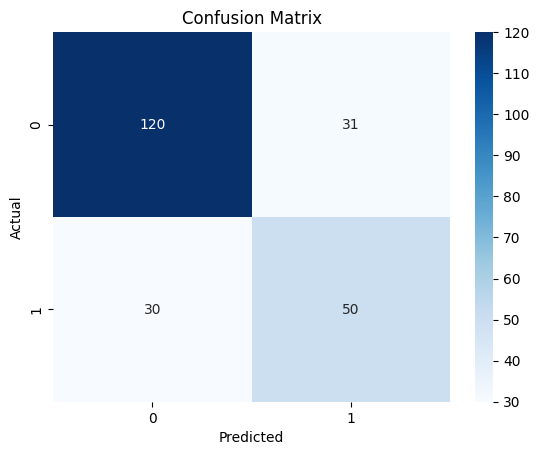

In [7]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()